<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/M4_Lab_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [45]:
#First we need to define a labeled data set. Let's make a toy dataset.
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [46]:
# Next we need to add a bias term -1 into the data set.
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [5]:
y = np.array([-1, -1, 1, 1, 1])

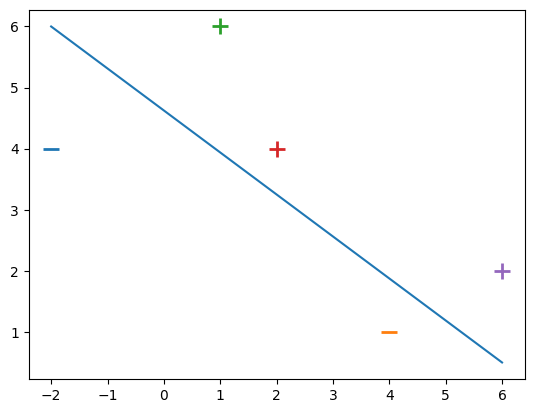

In [6]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

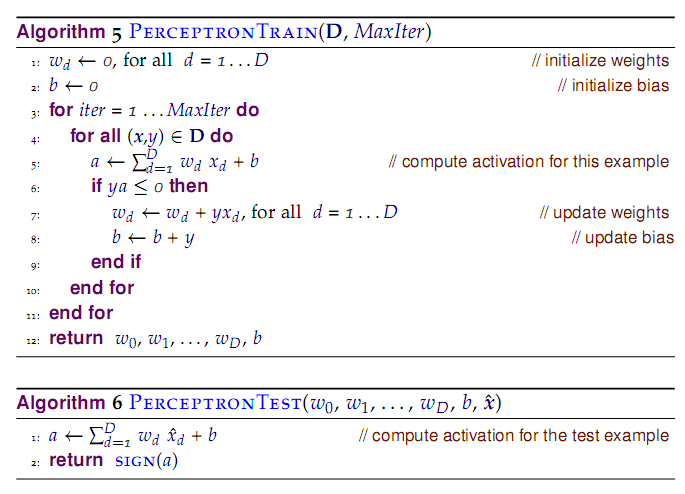

The algorithm is shown in the above image.

In [7]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [8]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Training error at each epoch.

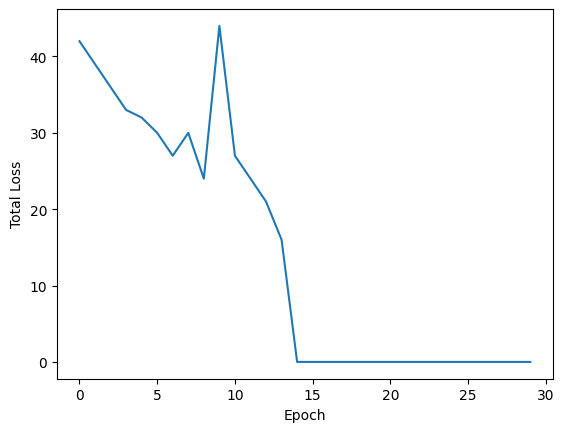

In [9]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

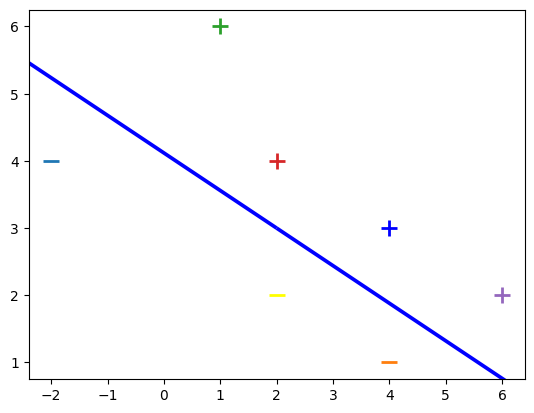

In [10]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

**Things to try:**

 **Task 1:**
- Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

-  I have used the 'Sonar' dataset for this task.


In [14]:
import pandas as pd
data = pd.read_csv('/content/sonar.csv')

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [16]:
df = pd.DataFrame(data=data)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [17]:
# Converting target labels to -1 and 1
y = np.where(y == 'R', -1, 1)

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
# Adding the bias term
X = np.hstack((X, -np.ones((X.shape[0], 1))))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Perceptron Algorithm with error tracking
def perceptron_algo_error(X, Y, epochs=30, eta=1):
    '''
    Train perceptron and plot the number of misclassified samples in each epoch.

    :param X: Data samples
    :param Y: Data labels
    :param epochs: Number of epochs
    :param eta: Learning rate
    :return: Weight vector as a numpy array, error list
    '''
    w = np.zeros(X.shape[1])  # Initialize weights to zero
    errors = []  # To track the number of misclassified samples

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:  # Misclassification
                total_error += 1
                w = w + eta * X[i] * Y[i]  # Update weights
        errors.append(total_error)  # Track error for this epoch

    return w, errors

In [22]:
# Train the perceptron and get errors per epoch
weights, error_history = perceptron_algo_error(X_train, y_train, epochs=30, eta=1)

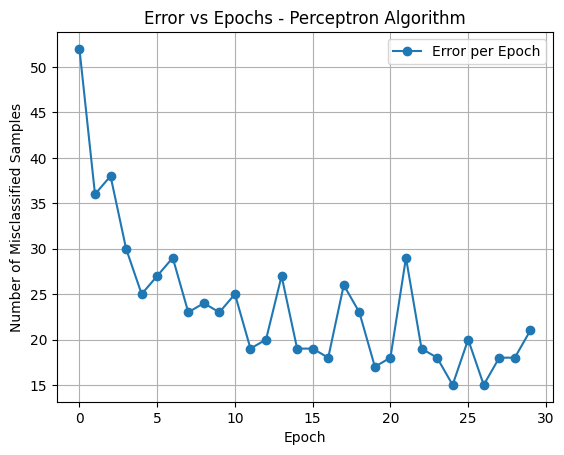

In [23]:
plt.plot(error_history, marker='o', label='Error per Epoch')
plt.title('Error vs Epochs - Perceptron Algorithm')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassified Samples')
plt.grid()
plt.legend()
plt.show()

**Task 2:**
- Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In [24]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for eta in learning_rates:
    print(f"\nTraining with learning rate eta = {eta}")
    weights = perceptron_algo_error(X_train, y_train, epochs=100, eta=eta)


Training with learning rate eta = 0.0001

Training with learning rate eta = 0.001

Training with learning rate eta = 0.01

Training with learning rate eta = 0.1

Training with learning rate eta = 1

Training with learning rate eta = 10


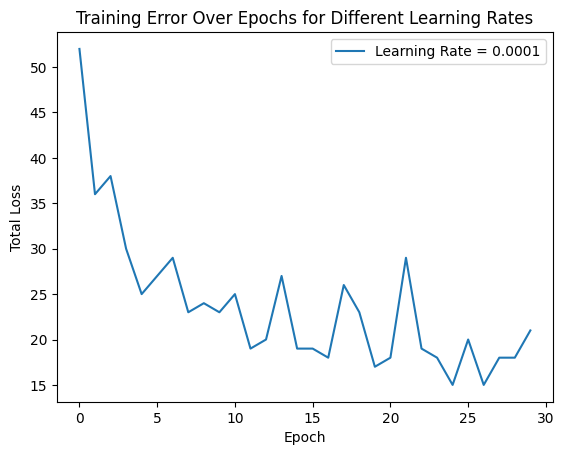

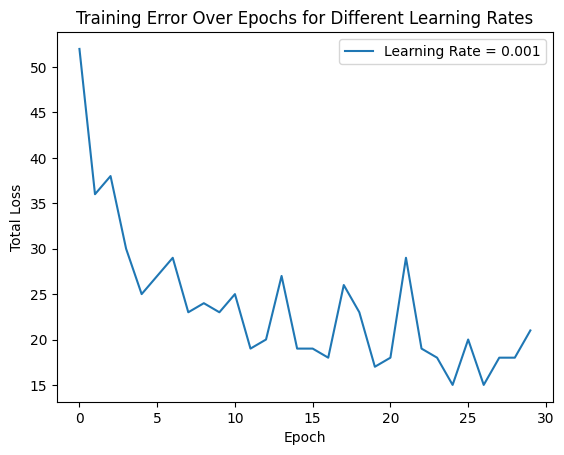

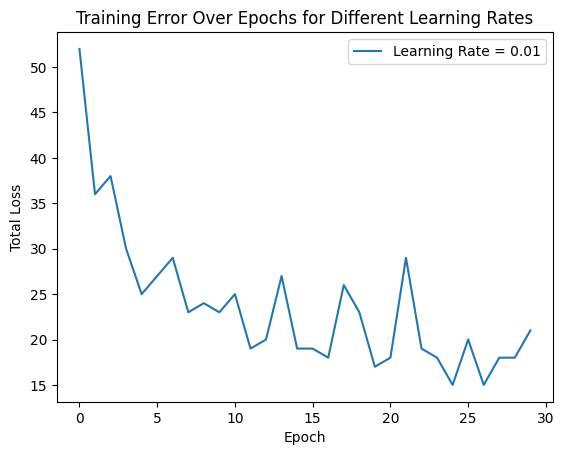

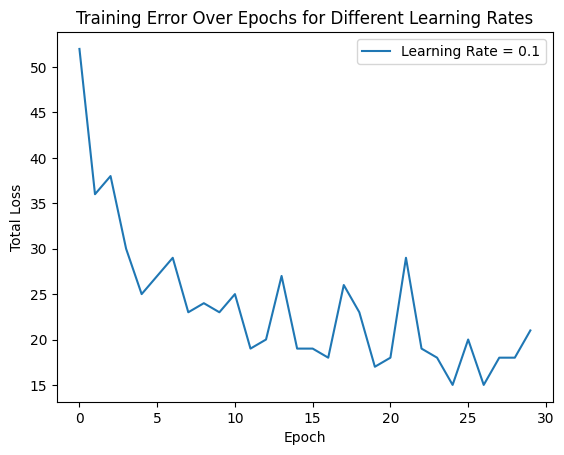

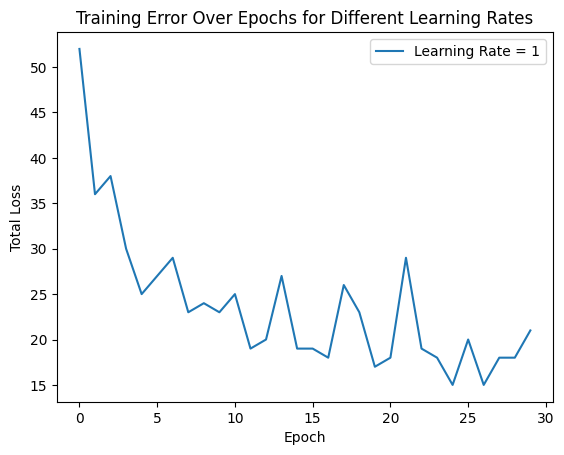

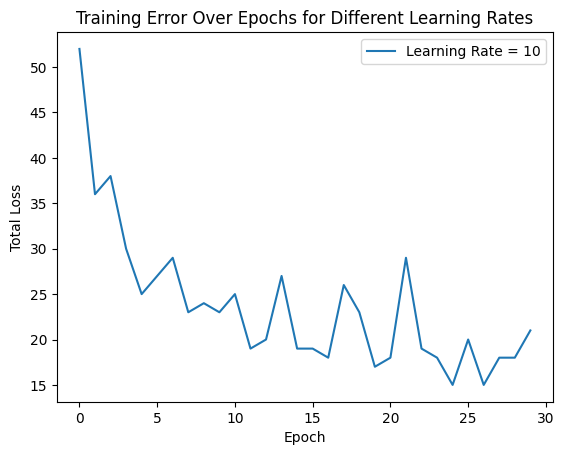

In [25]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for eta in learning_rates:
    weights, errors = perceptron_algo_error(X_train, y_train, eta=eta)

    plt.plot(errors, label=f'Learning Rate = {eta}')

    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Training Error Over Epochs for Different Learning Rates')
    plt.legend()
    plt.show()

**Observations:**
- I experimented with different learning rates, but despite changing the values, all the graphs and convergence patterns looked the same.
- I believe that for this particular dataset, the perceptron algorithm quickly converges to a solution, regardless of the learning rate.


**Task 3:**
- Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

In [34]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [35]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


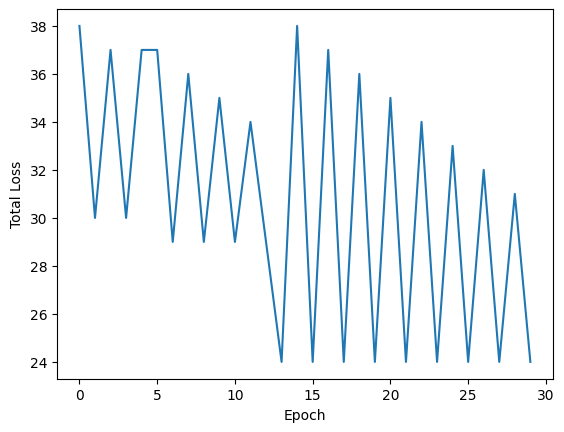

In [13]:
print(perceptron_algo_plot(X, y))

Observations:
- If the training data is not linearly separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

In [42]:
# Taking another Toy Dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

In [38]:
X = np.array([
    [0, 0, -1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, -1]
])

In [39]:
y = np.array([-1, 1, 1, -1])

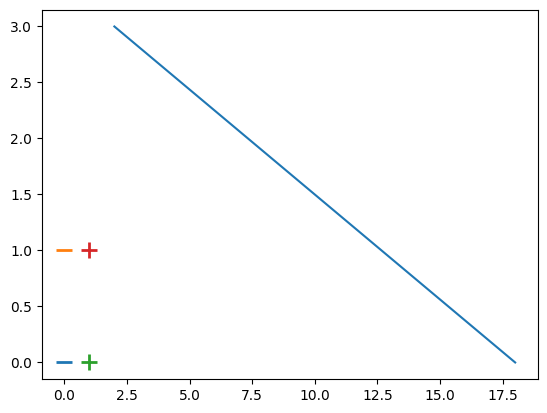

In [43]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)
plt.plot([18, 2], [0, 3])

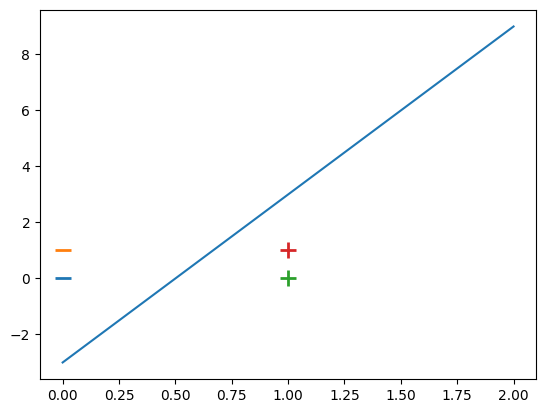

In [44]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([0, 2], [-3, 9])

**Observations:**
- When the perceptron algorithm is applied to a non-linearly separable dataset (ie; the first example), it fails to converge to a solution that can separate the classes.  
- However, in the second example, I experimented with different hyperplane points, and tried to find a separating boundary for the dataset.


## **Additional Critical Thinking Questions**

**Q1)  Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.**

  **Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.**

**i) Answer if this dataset is learnable by Perceptron**  
- Yes, the AND function is linearly separable.
- There exists a hyperplane that can perfectly separate the positive and negative examples in the dataset.
- The positive class (1,1) can easily be seperated from the other negative classes (0,0), (0,1), (1,0) with the hyperplane.
- Therefore, the Perceptron algorithm can learn this dataset.



**ii) if so, write down the weights update procedure for each iteration; if not, explain why.**
- We start with initial weights w = [0, 0] and bias b = 0.
- Then we use a learning rate 𝜂 to determine the step size.
- For each input with corresponding target output 'y';
if the predicted output y^ from the Perceptron does not match the target then we use the equations given below:
-- Wi = Wi + 𝜂. (y-y^). xi
-- b = b + 𝜂. (y-y^)

- w: Weights of the inputs

- b: Bias term.
- 𝜂: Learning rate (step size).

- y: Actual (target) output.

- y^ : Predicted output.



- Finally, we repeat this process for each misclassified sample
-- until the weights converge
-- or all samples are correctly classified.



**Q2) Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?**

  **Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.**

  - Perceptron can learn functions like AND, OR, NAND, NOR, Identity, and negations since they are linearly separable.
  - Perceptron can't learn XOR and XNOR as they are not linearly separable and.
  - Truth Table for **XOR**

  A   B    y

  0   0   -1

  0   1    1

  1   0    1

  1   1   -1

  - Truth Table for **XNOR**

  A   B     y

  0   0    1

  0   1   -1

  1   0   -1

  1   1    1